In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical, plot_model
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1)

In [3]:
# Build the neural network model
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(28, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(56, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.yticks(np.arange(0.8,1.01,0.01))
    plt.ylim(0.89,1)
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

Epoch 1/20
240/240 [==============================] - 20s 82ms/step - loss: 0.7462 - accuracy: 0.7697 - val_loss: 5.0350 - val_accuracy: 0.1136
Epoch 2/20
240/240 [==============================] - 19s 80ms/step - loss: 0.2262 - accuracy: 0.9354 - val_loss: 0.2757 - val_accuracy: 0.9136
Epoch 3/20
240/240 [==============================] - 19s 81ms/step - loss: 0.1443 - accuracy: 0.9581 - val_loss: 0.0420 - val_accuracy: 0.9866
Epoch 4/20
240/240 [==============================] - 20s 84ms/step - loss: 0.1168 - accuracy: 0.9658 - val_loss: 0.0356 - val_accuracy: 0.9888
Epoch 5/20
240/240 [==============================] - 20s 85ms/step - loss: 0.0993 - accuracy: 0.9713 - val_loss: 0.0258 - val_accuracy: 0.9919
Epoch 6/20
240/240 [==============================] - 21s 87ms/step - loss: 0.0869 - accuracy: 0.9746 - val_loss: 0.0223 - val_accuracy: 0.9927
Epoch 7/20
240/240 [==============================] - 21s 86ms/step - loss: 0.0794 - accuracy: 0.9772 - val_loss: 0.0194 - val_accuracy:

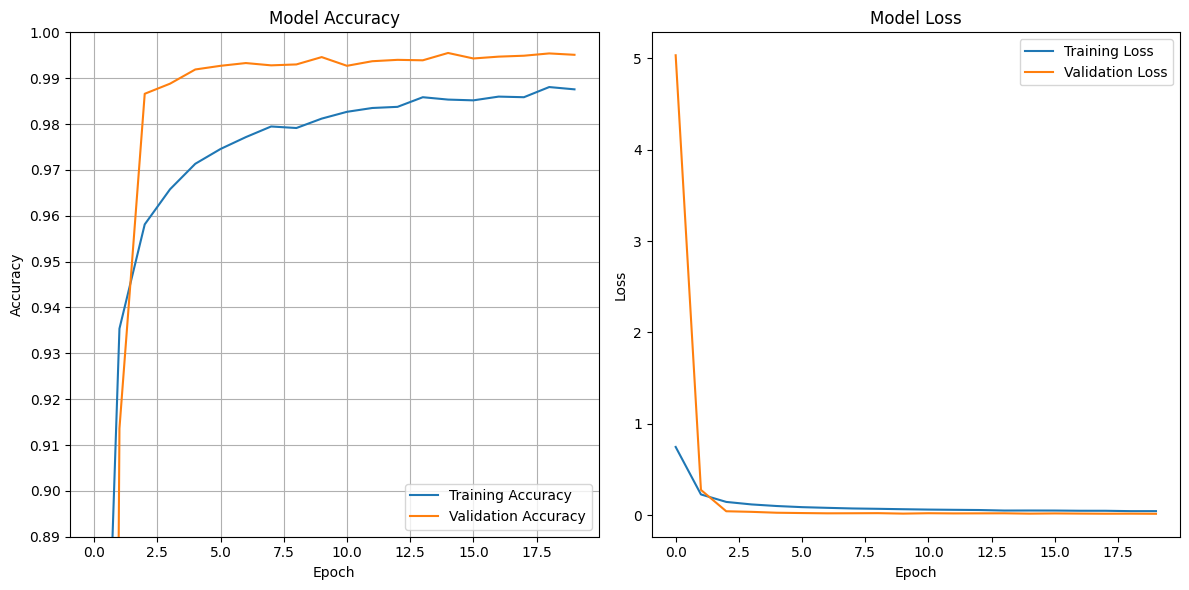

In [5]:
# Train the model
#history = model.fit(train_images, train_labels, epochs=10, batch_size=250, validation_data=(test_images, test_labels))
gen_train_images = datagen.flow(train_images, train_labels, batch_size=250)

history = model.fit(gen_train_images, epochs=20, validation_data=(test_images, test_labels))

plot_history(history)

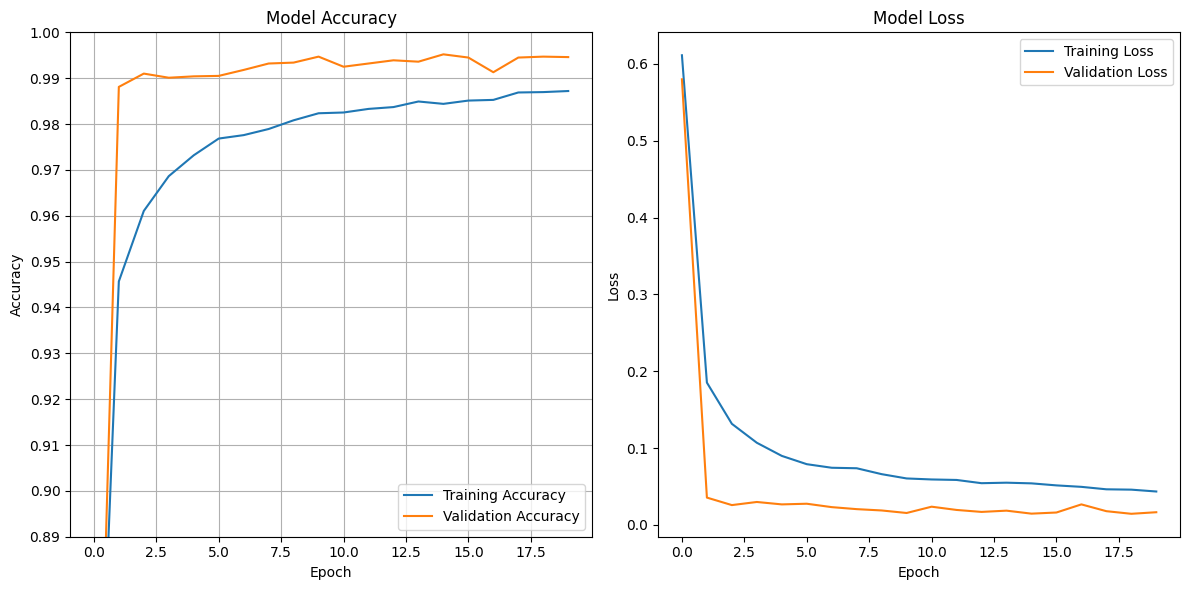

In [79]:
plot_history(history)

In [10]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 2s 8ms/step - loss: 0.0177 - accuracy: 0.9938
Test accuracy: 0.9937999844551086


In [6]:
# Make predictions on new data
predictions = model.predict(test_images[5:10])
predicted_labels = [tf.argmax(prediction).numpy() for prediction in predictions]
print(f'Predicted labels:\n {predicted_labels}')
print(f'Actual labels:\n {test_labels[:5]}')

1/1 [==============================] - 0s 84ms/step
Predicted labels:
 [1, 4, 9, 5, 9]
Actual labels:
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [7]:
predictions

array([[2.26329409e-08, 9.99999523e-01, 1.28109381e-08, 6.70818290e-10,
        1.17838653e-07, 1.35932332e-08, 3.23872520e-08, 2.95972171e-07,
        7.77277243e-10, 8.25459523e-09],
       [9.60665059e-09, 4.49450499e-06, 2.39385933e-08, 7.06308401e-10,
        9.99639034e-01, 9.21604979e-08, 4.18944701e-08, 1.22473989e-06,
        1.09549865e-06, 3.54033720e-04],
       [4.74280711e-07, 2.77337080e-07, 1.11554607e-06, 9.81578978e-08,
        4.41328048e-05, 1.43747542e-07, 6.82728114e-08, 2.73450667e-07,
        3.24369944e-06, 9.99950171e-01],
       [3.42805123e-07, 1.60352283e-08, 2.09912105e-08, 4.08445999e-07,
        1.12729580e-07, 9.99731958e-01, 2.57305015e-04, 1.43900145e-08,
        9.18554542e-06, 6.21255765e-07],
       [2.94677491e-08, 9.86721704e-10, 6.96269098e-10, 9.41009137e-09,
        1.11260852e-05, 7.73180986e-09, 4.44240783e-10, 1.45794320e-06,
        5.11813994e-07, 9.99986887e-01]], dtype=float32)

In [8]:
predictions = model.predict(test_images)

# Find misclassified instances
true_labels = np.argmax(test_labels, axis=1)

# Find misclassified instances
misclassified_indices = np.where(np.argmax(predictions, axis=1) != true_labels)[0]
print('number of misclassified images: ' + str(misclassified_indices.shape[0]))

313/313 [==============================] - 1s 5ms/step
number of misclassified images: 49


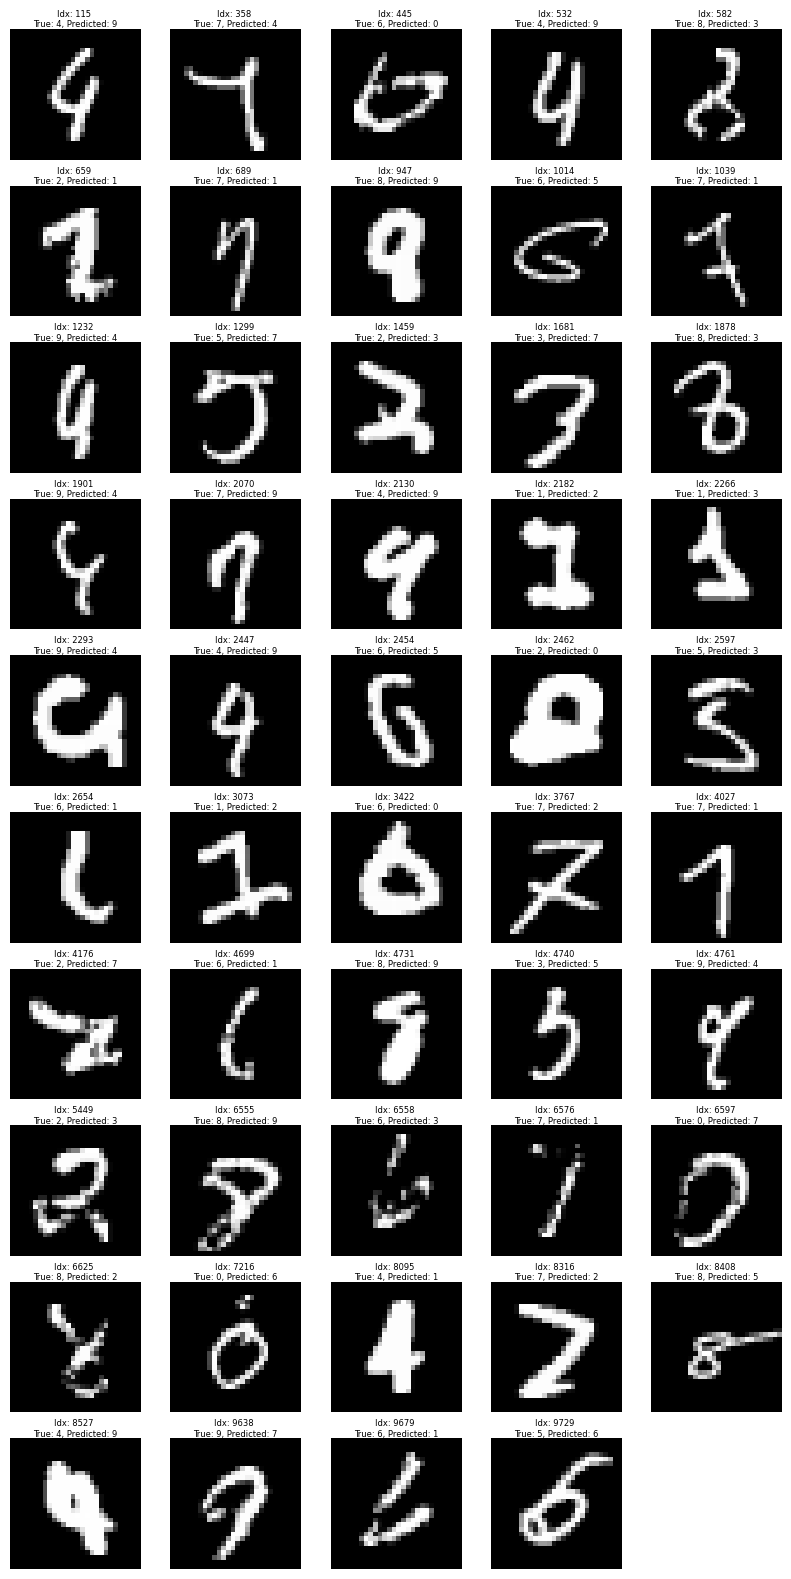

In [9]:
# Plot the first 5 misclassified images
plt.figure(figsize=(10, 20))

nmbr = misclassified_indices.shape[0]

for i in range(nmbr):
    plt.subplot(nmbr//5+1, 5, i + 1)
    index = misclassified_indices[i]
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f"Idx: {index} \nTrue: {true_labels[index]}, Predicted: {np.argmax(predictions[index])}", fontsize=6, pad=-.2)
    plt.axis('off')

plt.show()

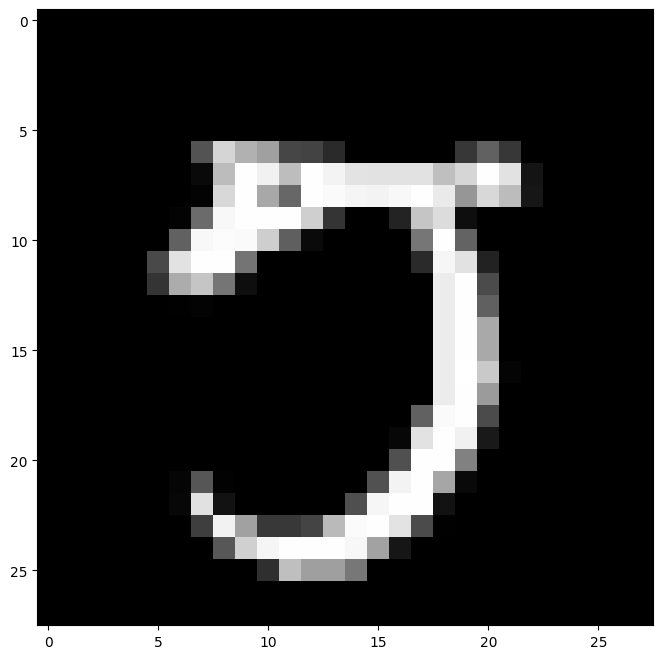

0: 0.000124
1: 0.000192
2: 0.002059
3: 0.039685
4: 0.000015
5: 0.468376
6: 0.000002
7: 0.489397
8: 0.000004
9: 0.000144


In [20]:
n = 11

plt.figure(figsize=(8, 8))

plt.imshow(test_images[misclassified_indices[n]].reshape(28, 28), cmap='gray')

plt.show()

predictions[misclassified_indices[n]]

for i in range(10):
    print(f'{i}: {predictions[misclassified_indices[n]][i]:.6f}')

In [ ]:
[583, 659, 947, 1232, 1260, 1393, 1459, 1737, 1901, 2654, 3422, 4027, 4369, 4699, 4740, 4823, 4874, 5654, 5937, 5955, 6783, 8316, 9634, 9679, 9729]

In [26]:
print(test_images[0].mean(), test_images.shape)

0.092306934 (10000, 28, 28, 1)


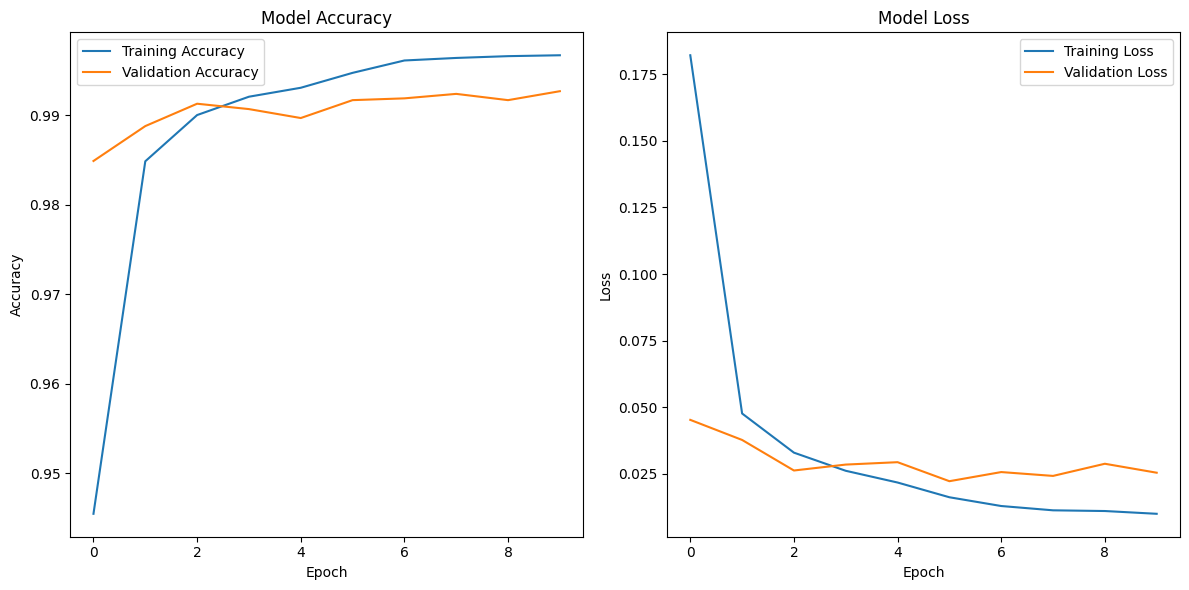

In [68]:
# Call the function to plot the history
plot_history(history)


In [79]:
gpu_devices = tf.config.list_physical_devices('GPU')

if gpu_devices:
    print("GPU is available.")
    # Additional information about each GPU
    for device in gpu_devices:
        print(f"Device name: {device.name}")
        print(f"Device type: {device.device_type}")
else:
    print("GPU is not available. TensorFlow will run on CPU.")

GPU is not available. TensorFlow will run on CPU.


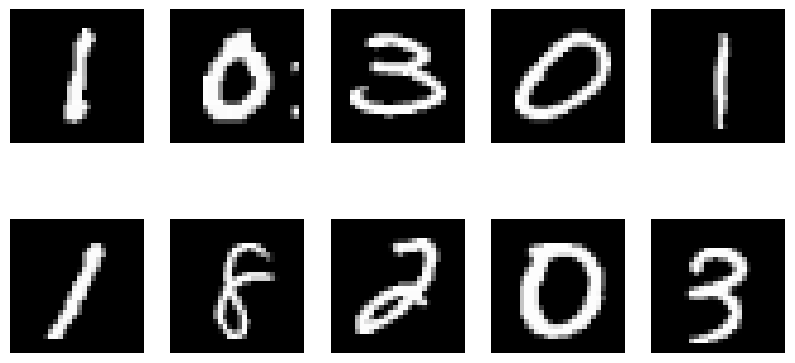

In [29]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i+450], cmap='gray')
    #plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()

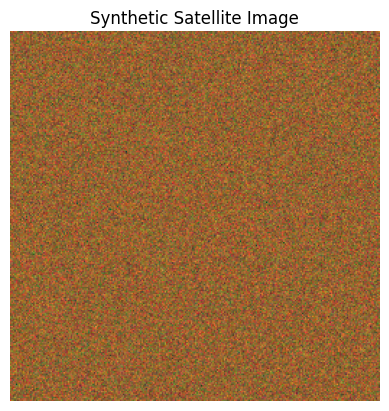

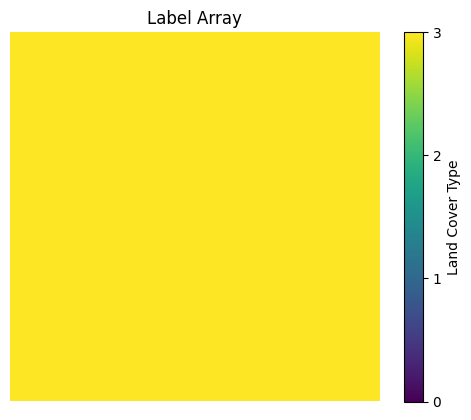

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def generate_synthetic_satellite_image(image_size):
    # Generate synthetic textures for different land cover types
    cloud_texture = np.random.normal(150, 30, size=(image_size, image_size))
    water_texture = np.random.normal(100, 20, size=(image_size, image_size))
    vegetation_texture = np.random.normal(50, 10, size=(image_size, image_size))
    non_vegetation_texture = np.random.normal(80, 15, size=(image_size, image_size))

    # Create an empty RGB image
    synthetic_image = np.zeros((image_size, image_size, 3), dtype=np.uint8)

    # Assign textures to different channels (R, G, B)
    synthetic_image[:, :, 0] = cloud_texture
    synthetic_image[:, :, 1] = water_texture
    synthetic_image[:, :, 2] = vegetation_texture

    # Normalize values to the range [0, 255]
    synthetic_image = (synthetic_image - synthetic_image.min()) / (synthetic_image.max() - synthetic_image.min()) * 255

    return synthetic_image.astype(np.uint8)

def generate_label_array(image_size):
    # Generate synthetic labels for different land cover types
    cloud_labels = np.zeros((image_size, image_size))
    water_labels = np.ones((image_size, image_size))
    vegetation_labels = 2 * np.ones((image_size, image_size))
    non_vegetation_labels = 3 * np.ones((image_size, image_size))

    # Combine labels into a single label array
    label_array = cloud_labels + water_labels + vegetation_labels + non_vegetation_labels

    return label_array.astype(np.uint8)

# Set the image size
image_size = 256

# Generate synthetic satellite image
synthetic_image = generate_synthetic_satellite_image(image_size)

# Display the synthetic image
plt.imshow(synthetic_image)
plt.title('Synthetic Satellite Image')
plt.axis('off')
plt.show()

# Generate label array
label_array = generate_label_array(image_size)

# Display the label array
plt.imshow(label_array, cmap='viridis', vmin=0, vmax=3)
plt.colorbar(ticks=[0, 1, 2, 3], label='Land Cover Type')
plt.title('Label Array')
plt.axis('off')
plt.show()
